In [114]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [115]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
     

In [116]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [117]:
from google.colab import files
uploaded=files.upload()


Saving salesmen.csv to salesmen (2).csv


In [118]:
df=spark.read.format('csv').load('salesmen.csv',header=True)
df.show()

+-------+--------+-------+
|   Date|Salesman|Revenue|
+-------+--------+-------+
| 1/1/16|     Bob|   7172|
| 1/2/16|     Bob|   6362|
| 1/3/16|     Bob|   5982|
| 1/4/16|     Bob|   7917|
| 1/5/16|     Bob|   7837|
| 1/6/16|     Bob|   1744|
| 1/7/16|     Bob|    918|
| 1/8/16|     Bob|   9863|
| 1/9/16|     Bob|   8337|
|1/10/16|     Bob|   7543|
|1/11/16|     Bob|   1053|
|1/12/16|     Bob|   4362|
|1/13/16|     Bob|   6812|
|1/14/16|     Bob|   9047|
|1/15/16|     Bob|   3594|
|1/16/16|     Bob|   9800|
|1/17/16|     Bob|   7215|
|1/18/16|     Bob|   7744|
|1/19/16|     Bob|   9560|
|1/20/16|     Bob|   9863|
+-------+--------+-------+
only showing top 20 rows



In [119]:
import pyspark 
from pyspark.sql.functions import split
split_col = pyspark.sql.functions.split(df['Date'], '/')
df1 = df.select("Date","Salesman","Revenue", split_col.getItem(0).alias('Month'),split_col.getItem(1).alias('Day'),split_col.getItem(2).alias('Year'))   
df1.show(truncate=False)

+-------+--------+-------+-----+---+----+
|Date   |Salesman|Revenue|Month|Day|Year|
+-------+--------+-------+-----+---+----+
|1/1/16 |Bob     |7172   |1    |1  |16  |
|1/2/16 |Bob     |6362   |1    |2  |16  |
|1/3/16 |Bob     |5982   |1    |3  |16  |
|1/4/16 |Bob     |7917   |1    |4  |16  |
|1/5/16 |Bob     |7837   |1    |5  |16  |
|1/6/16 |Bob     |1744   |1    |6  |16  |
|1/7/16 |Bob     |918    |1    |7  |16  |
|1/8/16 |Bob     |9863   |1    |8  |16  |
|1/9/16 |Bob     |8337   |1    |9  |16  |
|1/10/16|Bob     |7543   |1    |10 |16  |
|1/11/16|Bob     |1053   |1    |11 |16  |
|1/12/16|Bob     |4362   |1    |12 |16  |
|1/13/16|Bob     |6812   |1    |13 |16  |
|1/14/16|Bob     |9047   |1    |14 |16  |
|1/15/16|Bob     |3594   |1    |15 |16  |
|1/16/16|Bob     |9800   |1    |16 |16  |
|1/17/16|Bob     |7215   |1    |17 |16  |
|1/18/16|Bob     |7744   |1    |18 |16  |
|1/19/16|Bob     |9560   |1    |19 |16  |
|1/20/16|Bob     |9863   |1    |20 |16  |
+-------+--------+-------+-----+--

In [120]:
df2=df1.select('Date')
df2.show()

+-------+
|   Date|
+-------+
| 1/1/16|
| 1/2/16|
| 1/3/16|
| 1/4/16|
| 1/5/16|
| 1/6/16|
| 1/7/16|
| 1/8/16|
| 1/9/16|
|1/10/16|
|1/11/16|
|1/12/16|
|1/13/16|
|1/14/16|
|1/15/16|
|1/16/16|
|1/17/16|
|1/18/16|
|1/19/16|
|1/20/16|
+-------+
only showing top 20 rows



In [121]:
df3=df1.select('Salesman','Revenue')
df3.show()

+--------+-------+
|Salesman|Revenue|
+--------+-------+
|     Bob|   7172|
|     Bob|   6362|
|     Bob|   5982|
|     Bob|   7917|
|     Bob|   7837|
|     Bob|   1744|
|     Bob|    918|
|     Bob|   9863|
|     Bob|   8337|
|     Bob|   7543|
|     Bob|   1053|
|     Bob|   4362|
|     Bob|   6812|
|     Bob|   9047|
|     Bob|   3594|
|     Bob|   9800|
|     Bob|   7215|
|     Bob|   7744|
|     Bob|   9560|
|     Bob|   9863|
+--------+-------+
only showing top 20 rows



In [122]:
df4=df1.select('Month','Day','Year')
df4.show()

+-----+---+----+
|Month|Day|Year|
+-----+---+----+
|    1|  1|  16|
|    1|  2|  16|
|    1|  3|  16|
|    1|  4|  16|
|    1|  5|  16|
|    1|  6|  16|
|    1|  7|  16|
|    1|  8|  16|
|    1|  9|  16|
|    1| 10|  16|
|    1| 11|  16|
|    1| 12|  16|
|    1| 13|  16|
|    1| 14|  16|
|    1| 15|  16|
|    1| 16|  16|
|    1| 17|  16|
|    1| 18|  16|
|    1| 19|  16|
|    1| 20|  16|
+-----+---+----+
only showing top 20 rows



In [123]:
'''from pyspark.sql.types import StructType, StructField, IntegerType, StringType
schema=StructType([\
                  StructField("Month",IntegerType(),True),\
                  StructField("Day",IntegerType(),True),\
                  StructField("Year",IntegerType(),True)\
                   ])'''

'from pyspark.sql.types import StructType, StructField, IntegerType, StringType\nschema=StructType([                  StructField("Month",IntegerType(),True),                  StructField("Day",IntegerType(),True),                  StructField("Year",IntegerType(),True)                   ])'

In [124]:
#unioned_df = unionAll([df2, df4, df3])
#unioned_df.show()
#dataframe2 = spark.createDataFrame(df2, df4)
#dataframe2.show()
df5=df2.join(df4,df2["Date"] == df4["Month"])
df5.show()

+----+-----+---+----+
|Date|Month|Day|Year|
+----+-----+---+----+
+----+-----+---+----+



In [125]:
df6=df3.join(df5,df3['Salesman']==df5['Year'])
df6.show(10,truncate=False)                                              #doubt

+--------+-------+----+-----+---+----+
|Salesman|Revenue|Date|Month|Day|Year|
+--------+-------+----+-----+---+----+
+--------+-------+----+-----+---+----+



In [126]:
#df1.select('Revenue').distinct().orderBy('Revenue').collect()[0]['Revenue']

In [127]:
df1.agg({'Revenue': 'max'}).show()

+------------+
|max(Revenue)|
+------------+
|        9999|
+------------+



In [128]:
df1.agg({'Revenue': 'min'}).show()

+------------+
|min(Revenue)|
+------------+
|           1|
+------------+



In [129]:
df1.agg({'Revenue': 'avg'}).show()

+-----------------+
|     avg(Revenue)|
+-----------------+
|5032.541530054645|
+-----------------+



In [130]:
max_count=df1.groupBy('Revenue').count()
max_count.show()

+-------+-----+
|Revenue|count|
+-------+-----+
|   7711|    1|
|   7252|    1|
|   2136|    1|
|    675|    1|
|    467|    1|
|   4821|    1|
|   1436|    1|
|   1090|    1|
|   1572|    1|
|   8304|    1|
|   3517|    2|
|   5023|    1|
|    451|    1|
|   9830|    1|
|    944|    1|
|   8092|    1|
|   3826|    1|
|   9630|    1|
|   7743|    1|
|   7655|    1|
+-------+-----+
only showing top 20 rows



In [131]:
max_count.agg({'count': 'max'}).show()

+----------+
|max(count)|
+----------+
|         3|
+----------+



In [132]:
df1.select('Salesman').distinct().collect()

[Row(Salesman='Dave'),
 Row(Salesman='Ronald'),
 Row(Salesman='Bob'),
 Row(Salesman='Oscar'),
 Row(Salesman='Jeb')]

In [133]:
df1.select('Revenue').distinct().collect()

[Row(Revenue='7711'),
 Row(Revenue='7252'),
 Row(Revenue='2136'),
 Row(Revenue='675'),
 Row(Revenue='467'),
 Row(Revenue='4821'),
 Row(Revenue='1436'),
 Row(Revenue='1090'),
 Row(Revenue='1572'),
 Row(Revenue='8304'),
 Row(Revenue='3517'),
 Row(Revenue='5023'),
 Row(Revenue='451'),
 Row(Revenue='9830'),
 Row(Revenue='944'),
 Row(Revenue='8092'),
 Row(Revenue='3826'),
 Row(Revenue='9630'),
 Row(Revenue='7743'),
 Row(Revenue='7655'),
 Row(Revenue='1361'),
 Row(Revenue='2696'),
 Row(Revenue='7263'),
 Row(Revenue='5757'),
 Row(Revenue='7378'),
 Row(Revenue='6081'),
 Row(Revenue='7487'),
 Row(Revenue='666'),
 Row(Revenue='1953'),
 Row(Revenue='7249'),
 Row(Revenue='9196'),
 Row(Revenue='5297'),
 Row(Revenue='7'),
 Row(Revenue='6820'),
 Row(Revenue='8409'),
 Row(Revenue='4988'),
 Row(Revenue='6380'),
 Row(Revenue='1957'),
 Row(Revenue='1695'),
 Row(Revenue='5450'),
 Row(Revenue='3895'),
 Row(Revenue='7544'),
 Row(Revenue='613'),
 Row(Revenue='5048'),
 Row(Revenue='7316'),
 Row(Revenue='8502'

In [134]:
#df1.sort(col("Reveune").asc()).show(truncate=False)
df1.sort(df1.Revenue.asc()).show(truncate=False)

+--------+--------+-------+-----+---+----+
|Date    |Salesman|Revenue|Month|Day|Year|
+--------+--------+-------+-----+---+----+
|5/3/16  |Ronald  |1      |5    |3  |16  |
|7/31/16 |Oscar   |100    |7    |31 |16  |
|12/28/16|Bob     |100    |12   |28 |16  |
|8/10/16 |Oscar   |1008   |8    |10 |16  |
|1/26/16 |Jeb     |1009   |1    |26 |16  |
|12/7/16 |Bob     |1010   |12   |7  |16  |
|12/18/16|Oscar   |1022   |12   |18 |16  |
|5/20/16 |Dave    |1027   |5    |20 |16  |
|8/3/16  |Dave    |1028   |8    |3  |16  |
|6/28/16 |Oscar   |103    |6    |28 |16  |
|10/25/16|Oscar   |1037   |10   |25 |16  |
|4/25/16 |Jeb     |1040   |4    |25 |16  |
|9/15/16 |Oscar   |1042   |9    |15 |16  |
|1/11/16 |Bob     |1053   |1    |11 |16  |
|10/8/16 |Oscar   |1054   |10   |8  |16  |
|9/22/16 |Dave    |1064   |9    |22 |16  |
|4/7/16  |Dave    |1069   |4    |7  |16  |
|9/20/16 |Bob     |1071   |9    |20 |16  |
|8/26/16 |Jeb     |1090   |8    |26 |16  |
|9/4/16  |Ronald  |1093   |9    |4  |16  |
+--------+-

In [135]:
#
df1.sort(df1.Revenue.desc()).show(truncate=False)

+-------+--------+-------+-----+---+----+
|Date   |Salesman|Revenue|Month|Day|Year|
+-------+--------+-------+-----+---+----+
|3/30/16|Bob     |9999   |3    |30 |16  |
|5/15/16|Ronald  |9991   |5    |15 |16  |
|7/2/16 |Oscar   |9971   |7    |2  |16  |
|12/8/16|Ronald  |9951   |12   |8  |16  |
|6/14/16|Bob     |9945   |6    |14 |16  |
|8/12/16|Jeb     |9939   |8    |12 |16  |
|2/9/16 |Dave    |9939   |2    |9  |16  |
|7/25/16|Bob     |9934   |7    |25 |16  |
|6/14/16|Oscar   |9926   |6    |14 |16  |
|9/5/16 |Bob     |992    |9    |5  |16  |
|5/12/16|Ronald  |9912   |5    |12 |16  |
|6/2/16 |Oscar   |991    |6    |2  |16  |
|5/28/16|Ronald  |9902   |5    |28 |16  |
|3/24/16|Oscar   |9901   |3    |24 |16  |
|4/22/16|Bob     |9897   |4    |22 |16  |
|8/13/16|Ronald  |9896   |8    |13 |16  |
|1/15/16|Dave    |9883   |1    |15 |16  |
|3/13/16|Dave    |9874   |3    |13 |16  |
|9/15/16|Bob     |9868   |9    |15 |16  |
|5/28/16|Jeb     |9866   |5    |28 |16  |
+-------+--------+-------+-----+--

In [136]:
#only Bob
df1.filter(df1.Salesman == "Bob").show(truncate=False)

+-------+--------+-------+-----+---+----+
|Date   |Salesman|Revenue|Month|Day|Year|
+-------+--------+-------+-----+---+----+
|1/1/16 |Bob     |7172   |1    |1  |16  |
|1/2/16 |Bob     |6362   |1    |2  |16  |
|1/3/16 |Bob     |5982   |1    |3  |16  |
|1/4/16 |Bob     |7917   |1    |4  |16  |
|1/5/16 |Bob     |7837   |1    |5  |16  |
|1/6/16 |Bob     |1744   |1    |6  |16  |
|1/7/16 |Bob     |918    |1    |7  |16  |
|1/8/16 |Bob     |9863   |1    |8  |16  |
|1/9/16 |Bob     |8337   |1    |9  |16  |
|1/10/16|Bob     |7543   |1    |10 |16  |
|1/11/16|Bob     |1053   |1    |11 |16  |
|1/12/16|Bob     |4362   |1    |12 |16  |
|1/13/16|Bob     |6812   |1    |13 |16  |
|1/14/16|Bob     |9047   |1    |14 |16  |
|1/15/16|Bob     |3594   |1    |15 |16  |
|1/16/16|Bob     |9800   |1    |16 |16  |
|1/17/16|Bob     |7215   |1    |17 |16  |
|1/18/16|Bob     |7744   |1    |18 |16  |
|1/19/16|Bob     |9560   |1    |19 |16  |
|1/20/16|Bob     |9863   |1    |20 |16  |
+-------+--------+-------+-----+--

In [137]:
#only day 20
df1.filter("Day == '20'").show()

+--------+--------+-------+-----+---+----+
|    Date|Salesman|Revenue|Month|Day|Year|
+--------+--------+-------+-----+---+----+
| 1/20/16|     Bob|   9863|    1| 20|  16|
| 2/20/16|     Bob|    942|    2| 20|  16|
| 3/20/16|     Bob|   4780|    3| 20|  16|
| 4/20/16|     Bob|   6429|    4| 20|  16|
| 5/20/16|     Bob|   4707|    5| 20|  16|
| 6/20/16|     Bob|    590|    6| 20|  16|
| 7/20/16|     Bob|   4498|    7| 20|  16|
| 8/20/16|     Bob|   5124|    8| 20|  16|
| 9/20/16|     Bob|   1071|    9| 20|  16|
|10/20/16|     Bob|   7883|   10| 20|  16|
|11/20/16|     Bob|   1626|   11| 20|  16|
|12/20/16|     Bob|   3864|   12| 20|  16|
| 1/20/16|  Ronald|   9352|    1| 20|  16|
| 2/20/16|  Ronald|   5455|    2| 20|  16|
| 3/20/16|  Ronald|   5941|    3| 20|  16|
| 4/20/16|  Ronald|   8514|    4| 20|  16|
| 5/20/16|  Ronald|   4204|    5| 20|  16|
| 6/20/16|  Ronald|   1571|    6| 20|  16|
| 7/20/16|  Ronald|   3309|    7| 20|  16|
| 8/20/16|  Ronald|    160|    8| 20|  16|
+--------+-

In [138]:
#distinct year if any
df1.select('Year').distinct().collect()

[Row(Year='16')]

In [139]:
#rename one column
df1.withColumnRenamed("Month","Start_Month").show(50)

+-------+--------+-------+-----------+---+----+
|   Date|Salesman|Revenue|Start_Month|Day|Year|
+-------+--------+-------+-----------+---+----+
| 1/1/16|     Bob|   7172|          1|  1|  16|
| 1/2/16|     Bob|   6362|          1|  2|  16|
| 1/3/16|     Bob|   5982|          1|  3|  16|
| 1/4/16|     Bob|   7917|          1|  4|  16|
| 1/5/16|     Bob|   7837|          1|  5|  16|
| 1/6/16|     Bob|   1744|          1|  6|  16|
| 1/7/16|     Bob|    918|          1|  7|  16|
| 1/8/16|     Bob|   9863|          1|  8|  16|
| 1/9/16|     Bob|   8337|          1|  9|  16|
|1/10/16|     Bob|   7543|          1| 10|  16|
|1/11/16|     Bob|   1053|          1| 11|  16|
|1/12/16|     Bob|   4362|          1| 12|  16|
|1/13/16|     Bob|   6812|          1| 13|  16|
|1/14/16|     Bob|   9047|          1| 14|  16|
|1/15/16|     Bob|   3594|          1| 15|  16|
|1/16/16|     Bob|   9800|          1| 16|  16|
|1/17/16|     Bob|   7215|          1| 17|  16|
|1/18/16|     Bob|   7744|          1| 1

In [140]:
#rename multiple column
df1.withColumnRenamed("Day","Start_Day").withColumnRenamed("Year","Start_Year").show()

+-------+--------+-------+-----+---------+----------+
|   Date|Salesman|Revenue|Month|Start_Day|Start_Year|
+-------+--------+-------+-----+---------+----------+
| 1/1/16|     Bob|   7172|    1|        1|        16|
| 1/2/16|     Bob|   6362|    1|        2|        16|
| 1/3/16|     Bob|   5982|    1|        3|        16|
| 1/4/16|     Bob|   7917|    1|        4|        16|
| 1/5/16|     Bob|   7837|    1|        5|        16|
| 1/6/16|     Bob|   1744|    1|        6|        16|
| 1/7/16|     Bob|    918|    1|        7|        16|
| 1/8/16|     Bob|   9863|    1|        8|        16|
| 1/9/16|     Bob|   8337|    1|        9|        16|
|1/10/16|     Bob|   7543|    1|       10|        16|
|1/11/16|     Bob|   1053|    1|       11|        16|
|1/12/16|     Bob|   4362|    1|       12|        16|
|1/13/16|     Bob|   6812|    1|       13|        16|
|1/14/16|     Bob|   9047|    1|       14|        16|
|1/15/16|     Bob|   3594|    1|       15|        16|
|1/16/16|     Bob|   9800|  

In [141]:
#update column (multiply)
df1.withColumn("Revenue", df.Revenue*2).show()

+-------+--------+-------+-----+---+----+
|   Date|Salesman|Revenue|Month|Day|Year|
+-------+--------+-------+-----+---+----+
| 1/1/16|     Bob|14344.0|    1|  1|  16|
| 1/2/16|     Bob|12724.0|    1|  2|  16|
| 1/3/16|     Bob|11964.0|    1|  3|  16|
| 1/4/16|     Bob|15834.0|    1|  4|  16|
| 1/5/16|     Bob|15674.0|    1|  5|  16|
| 1/6/16|     Bob| 3488.0|    1|  6|  16|
| 1/7/16|     Bob| 1836.0|    1|  7|  16|
| 1/8/16|     Bob|19726.0|    1|  8|  16|
| 1/9/16|     Bob|16674.0|    1|  9|  16|
|1/10/16|     Bob|15086.0|    1| 10|  16|
|1/11/16|     Bob| 2106.0|    1| 11|  16|
|1/12/16|     Bob| 8724.0|    1| 12|  16|
|1/13/16|     Bob|13624.0|    1| 13|  16|
|1/14/16|     Bob|18094.0|    1| 14|  16|
|1/15/16|     Bob| 7188.0|    1| 15|  16|
|1/16/16|     Bob|19600.0|    1| 16|  16|
|1/17/16|     Bob|14430.0|    1| 17|  16|
|1/18/16|     Bob|15488.0|    1| 18|  16|
|1/19/16|     Bob|19120.0|    1| 19|  16|
|1/20/16|     Bob|19726.0|    1| 20|  16|
+-------+--------+-------+-----+--

In [142]:
#add column to an existing dataframe with random column
from pyspark.sql.functions import rand,when
df_new= df1.withColumn('New_Col', when(rand() > 0.5, 5).otherwise(1))
df_new.show(100)

+-------+--------+-------+-----+---+----+-------+
|   Date|Salesman|Revenue|Month|Day|Year|New_Col|
+-------+--------+-------+-----+---+----+-------+
| 1/1/16|     Bob|   7172|    1|  1|  16|      5|
| 1/2/16|     Bob|   6362|    1|  2|  16|      1|
| 1/3/16|     Bob|   5982|    1|  3|  16|      5|
| 1/4/16|     Bob|   7917|    1|  4|  16|      5|
| 1/5/16|     Bob|   7837|    1|  5|  16|      5|
| 1/6/16|     Bob|   1744|    1|  6|  16|      1|
| 1/7/16|     Bob|    918|    1|  7|  16|      5|
| 1/8/16|     Bob|   9863|    1|  8|  16|      1|
| 1/9/16|     Bob|   8337|    1|  9|  16|      5|
|1/10/16|     Bob|   7543|    1| 10|  16|      5|
|1/11/16|     Bob|   1053|    1| 11|  16|      5|
|1/12/16|     Bob|   4362|    1| 12|  16|      5|
|1/13/16|     Bob|   6812|    1| 13|  16|      5|
|1/14/16|     Bob|   9047|    1| 14|  16|      1|
|1/15/16|     Bob|   3594|    1| 15|  16|      1|
|1/16/16|     Bob|   9800|    1| 16|  16|      5|
|1/17/16|     Bob|   7215|    1| 17|  16|      1|


In [143]:
df_new.select('New_Col').distinct().collect()

[Row(New_Col=1), Row(New_Col=5)]

In [144]:
#make another column
'''from pyspark.sql.functions import *
data= df1.withColumn('fun', expr("Day"+"New_Col"))'''
df_new2= df_new.withColumn('New_Col2', when(rand() > 0.5, 4).otherwise(2))
df_new2.show(50)

+-------+--------+-------+-----+---+----+-------+--------+
|   Date|Salesman|Revenue|Month|Day|Year|New_Col|New_Col2|
+-------+--------+-------+-----+---+----+-------+--------+
| 1/1/16|     Bob|   7172|    1|  1|  16|      5|       2|
| 1/2/16|     Bob|   6362|    1|  2|  16|      1|       2|
| 1/3/16|     Bob|   5982|    1|  3|  16|      5|       4|
| 1/4/16|     Bob|   7917|    1|  4|  16|      5|       2|
| 1/5/16|     Bob|   7837|    1|  5|  16|      5|       4|
| 1/6/16|     Bob|   1744|    1|  6|  16|      1|       2|
| 1/7/16|     Bob|    918|    1|  7|  16|      5|       4|
| 1/8/16|     Bob|   9863|    1|  8|  16|      1|       2|
| 1/9/16|     Bob|   8337|    1|  9|  16|      5|       4|
|1/10/16|     Bob|   7543|    1| 10|  16|      5|       4|
|1/11/16|     Bob|   1053|    1| 11|  16|      5|       2|
|1/12/16|     Bob|   4362|    1| 12|  16|      5|       2|
|1/13/16|     Bob|   6812|    1| 13|  16|      5|       2|
|1/14/16|     Bob|   9047|    1| 14|  16|      1|       

In [145]:
#make a new column which is addition of last two columns of the latest datframe
df_new2.withColumn('total_col', df_new2.New_Col + df_new2.New_Col2).show()

+-------+--------+-------+-----+---+----+-------+--------+---------+
|   Date|Salesman|Revenue|Month|Day|Year|New_Col|New_Col2|total_col|
+-------+--------+-------+-----+---+----+-------+--------+---------+
| 1/1/16|     Bob|   7172|    1|  1|  16|      5|       2|        7|
| 1/2/16|     Bob|   6362|    1|  2|  16|      1|       2|        3|
| 1/3/16|     Bob|   5982|    1|  3|  16|      5|       4|        9|
| 1/4/16|     Bob|   7917|    1|  4|  16|      5|       2|        7|
| 1/5/16|     Bob|   7837|    1|  5|  16|      5|       4|        9|
| 1/6/16|     Bob|   1744|    1|  6|  16|      1|       2|        3|
| 1/7/16|     Bob|    918|    1|  7|  16|      5|       4|        9|
| 1/8/16|     Bob|   9863|    1|  8|  16|      1|       2|        3|
| 1/9/16|     Bob|   8337|    1|  9|  16|      5|       4|        9|
|1/10/16|     Bob|   7543|    1| 10|  16|      5|       4|        9|
|1/11/16|     Bob|   1053|    1| 11|  16|      5|       2|        7|
|1/12/16|     Bob|   4362|    1| 1

In [146]:
#summary statistics (mean, standard deviance, min ,max, count) of numerical columns
df_new2.describe().show()

+-------+------+--------+------------------+------------------+------------------+----+-----------------+------------------+
|summary|  Date|Salesman|           Revenue|             Month|               Day|Year|          New_Col|          New_Col2|
+-------+------+--------+------------------+------------------+------------------+----+-----------------+------------------+
|  count|  1830|    1830|              1830|              1830|              1830|1830|             1830|              1830|
|   mean|  null|    null| 5032.541530054645|6.5136612021857925|15.756830601092895|16.0|3.056830601092896|3.0076502732240438|
| stddev|  null|    null|2854.7410375826867|3.4521772648080224| 8.813938139770649| 0.0|1.999738859042977|  1.00024406430457|
|    min|1/1/16|     Bob|                 1|                 1|                 1|  16|                1|                 2|
|    max|9/9/16|  Ronald|              9999|                 9|                 9|  16|                5|                 4|


In [147]:
#calculate pair wise frequency of categorical columns
df_new2.crosstab('Day', 'Month').show()

+---------+---+---+---+---+---+---+---+---+---+---+---+---+
|Day_Month|  1| 10| 11| 12|  2|  3|  4|  5|  6|  7|  8|  9|
+---------+---+---+---+---+---+---+---+---+---+---+---+---+
|       12|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|        8|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       19|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       23|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|        4|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       15|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       11|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|        9|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       22|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       26|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       13|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       24|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|       16|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|  5|
|        5|  5|  5|  5|  5|  5|  5|  5| 

In [150]:
#DataFrame which won’t have duplicate rows of given DataFrame
df_new2.select('Date','Revenue','Day').dropDuplicates().show(50)

+--------+-------+---+
|    Date|Revenue|Day|
+--------+-------+---+
| 3/17/16|    571| 17|
|  7/7/16|   1331|  7|
|10/22/16|   9599| 22|
|10/23/16|   3569| 23|
| 6/19/16|   4988| 19|
|  7/9/16|   8782|  9|
|11/17/16|   5771| 17|
|  7/9/16|   3114|  9|
| 10/9/16|   1689|  9|
| 1/13/16|   2349| 13|
|  5/7/16|   9843|  7|
| 5/21/16|   7266| 21|
| 8/23/16|   4590| 23|
| 8/26/16|   1090| 26|
|  5/5/16|   2816|  5|
| 5/19/16|   4599| 19|
| 12/6/16|   3060|  6|
| 3/12/16|   4404| 12|
|  6/5/16|   3102|  5|
| 6/20/16|   1571| 20|
|10/14/16|    435| 14|
| 9/11/16|   6899| 11|
| 10/9/16|   1296|  9|
| 1/22/16|   2875| 22|
| 9/13/16|   8332| 13|
|11/20/16|   6488| 20|
|  9/5/16|    992|  5|
|10/24/16|   8216| 24|
|  6/3/16|   3381|  3|
|  7/1/16|   6544|  1|
| 2/18/16|    482| 18|
|10/30/16|    620| 30|
|  1/8/16|   9863|  8|
| 5/14/16|    785| 14|
|  1/5/16|   2287|  5|
| 3/21/16|   8446| 21|
| 5/27/16|   4520| 27|
|10/19/16|   9723| 19|
| 11/2/16|   4383|  2|
| 1/24/16|   6705| 24|
|  6/2/16| 

In [151]:
#filter the rows in df_new2 which has Revenue more than 8000
df_new2.filter(df_new2.Revenue > 8000).count()

354

In [154]:
#apply map operation on DataFrame
#df_new2.select('Revenue').map(lambda x:(x,1)).take(5)

In [155]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

In [160]:
#Creating Table using SQL queries
df_new2.registerTempTable('PritamTable')
sqlContext = SQLContext(spark)

In [166]:
sqlContext.sql('select Day from PritamTable').show(32)

+---+
|Day|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
| 20|
| 21|
| 22|
| 23|
| 24|
| 25|
| 26|
| 27|
| 28|
| 29|
| 30|
| 31|
|  1|
+---+
only showing top 32 rows



In [169]:
#Visualising in form of a table
sdf = spark.sql("select * from PritamTable limit 15")
display(sdf)

Date,Salesman,Revenue,Month,Day,Year,New_Col,New_Col2
1/1/16,Bob,7172,1,1,16,5,2
1/2/16,Bob,6362,1,2,16,1,2
1/3/16,Bob,5982,1,3,16,5,4
1/4/16,Bob,7917,1,4,16,5,2
1/5/16,Bob,7837,1,5,16,5,4
1/6/16,Bob,1744,1,6,16,1,2
1/7/16,Bob,918,1,7,16,5,4
1/8/16,Bob,9863,1,8,16,1,2
1/9/16,Bob,8337,1,9,16,5,4
1/10/16,Bob,7543,1,10,16,5,4


In [172]:
from pyspark.sql.types import ArrayType,IntegerType
arrayType = ArrayType(IntegerType(),False)
print(arrayType.jsonValue()) 
print(arrayType.simpleString())
print(arrayType.typeName()) 


{'type': 'array', 'elementType': 'integer', 'containsNull': False}
array<int>
array


In [186]:
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

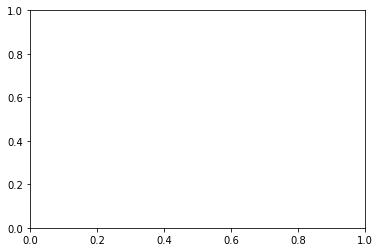

In [189]:
#bargraph
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
hist(ax, df_new2.select('Month'), bins = 10, color=['red'])                     #doubt